## Import Data

In [1]:
import re
import emoji
import pandas as pd
import numpy as np

data = pd.read_excel('dataset.xlsx')
data

,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,kenapa hanya ustadz kenapa bukan guru yang tid...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
2,2022-11-14 22:44:42+00:00,wawanikip,0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health tapi gak mengerti...
3,2022-12-20 08:12:15+00:00,minkabora,0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya siapa yang benar berjuang ga menyera...
4,2022-12-01 14:21:33+00:00,wipilarpa,0,Kalau lingkungan kerjanya sama kaya yg di Band...,Others,kalau lingkungan kerjanya sama kaya yang di ba...
...,...,...,...,...,...,...
3823,2022-10-30 19:38:01+00:00,mbaimmmm,0,"@simplybadut Pas udah tenang, dia cerita kalo ...",Classification,pas sudah tenang dia cerita kalau dia sudah bi...
3824,2022-11-19 09:29:03+00:00,collegemenfess,2,[cm] hii hii🙏maaf all disini aku mau minta tol...,Accessibility and Funding,cm hii hii maaf all disini aku mau minta tolon...
3825,2022-10-27 14:10:16+00:00,convomfs,6,🤍 tw mental health issues\n\nada yang tau ga k...,Accessibility and Funding,tahu mental health issues ada yang tahu ga kal...
3826,2022-12-19 17:48:42+00:00,UGM_FESS,30,Ugm_fess generasi kita yg paling keras teriak ...,Youth,ugm fess generasi kita yang paling keras teria...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datetime     3828 non-null   object
 1   Username     3828 non-null   object
 2   Like Counts  3828 non-null   int64 
 3   Tweet        3828 non-null   object
 4   Class        3828 non-null   object
 5   cleanText    3828 non-null   object
dtypes: int64(1), object(5)
memory usage: 179.6+ KB


## Preprocessing

In [3]:
data = data[data.Class != '-']

In [4]:
slang_words = {"amp": "dan", "@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "skg": "sekarang", "skrg": "sekarang", "skrng": "sekarang", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkwk": "tertawa","wkwk": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "bundir": "bunuh diri"}

In [5]:
def apply_abbreviations(text):
    words = text.split()
    abbreviated_words = [slang_words.get(word, word) for word in words]
    return ' '.join(abbreviated_words)

In [6]:
def cleanTweets(text):
    text = re.sub(r'@\w+', '', text) 
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('#','',text)
    text = re.sub('\d+', '', text)
    text = re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]+','', text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text
data['cleanText'] = data['Tweet'].apply(cleanTweets) 
data

,Datetime,Username,Like Counts,Tweet,Class,cleanText
0,2022-11-02 20:59:07+00:00,Syar_bjm,3,@PangeranBiru212 @Samudera_Estu Knp hanya usta...,Feelings and Problematization,knp hanya ustadz knp bkn guru yg tdk cukup me...
1,2022-11-10 04:50:26+00:00,Hazelnutxha,0,Replyannya bnrn darurat edukasi mental health ...,Feelings and Problematization,replyannya bnrn darurat edukasi mental health ...
2,2022-11-14 22:44:42+00:00,wawanikip,0,Generasi melek mental health tapi gak ngerti a...,Youth,generasi melek mental health tapi gak ngerti a...
3,2022-12-20 08:12:15+00:00,minkabora,0,"@indomyfess Logikanya, siapa yang bener2 berju...",Feelings and Problematization,logikanya siapa yang bener berjuang ga meny...
4,2022-12-01 14:21:33+00:00,wipilarpa,0,Kalau lingkungan kerjanya sama kaya yg di Band...,Others,kalau lingkungan kerjanya sama kaya yg di band...
...,...,...,...,...,...,...
3823,2022-10-30 19:38:01+00:00,mbaimmmm,0,"@simplybadut Pas udah tenang, dia cerita kalo ...",Classification,pas udah tenang dia cerita kalo dia udah bias...
3824,2022-11-19 09:29:03+00:00,collegemenfess,2,[cm] hii hii🙏maaf all disini aku mau minta tol...,Accessibility and Funding,cm hii hii maaf all disini aku mau minta tol...
3825,2022-10-27 14:10:16+00:00,convomfs,6,🤍 tw mental health issues\n\nada yang tau ga k...,Accessibility and Funding,tw mental health issues ada yang tau ga kal...
3826,2022-12-19 17:48:42+00:00,UGM_FESS,30,Ugm_fess generasi kita yg paling keras teriak ...,Youth,ugm fess generasi kita yg paling keras teriak ...


In [7]:
data['cleanText'] = data['cleanText'].apply(apply_abbreviations)

## Target Class Distribution (Data Original)

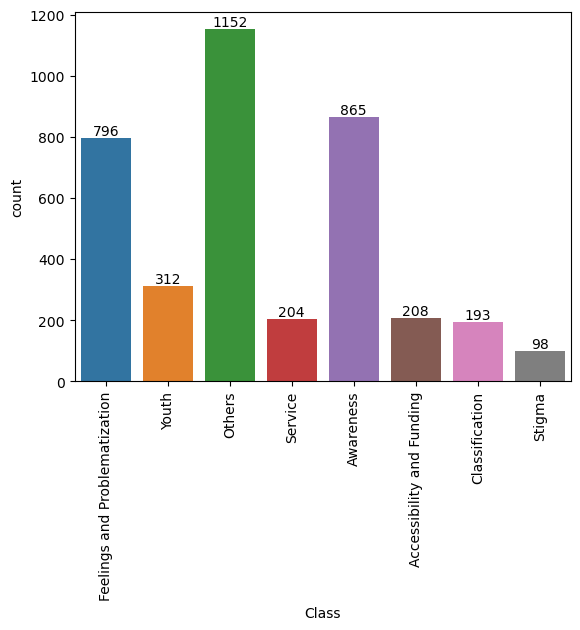

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=data['Class'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = data[data.Class != 'Others']
data['Class'] = le.fit_transform(data['Class'])

/var/folders/_l/mh9hlz0s03xg8z3s309b4qgr0000gn/T/ipykernel_37254/4177335227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class'] = le.fit_transform(data['Class'])


## Bag of Words 

In [10]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [11]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(max_sequence_length,), dtype='int32'))
model.add(tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 16))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 16)            139824    
                                                                 
 flatten (Flatten)           (None, 928)               0         
                                                                 
 dense (Dense)               (None, 7)                 6503      
                                                                 
Total params: 146327 (571.59 KB)
Trainable params: 146327 (571.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
from sklearn.model_selection import train_test_split

train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=43)

In [15]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/30
76/76 [==============================] - 0s 2ms/step - loss: 1.7052 - accuracy: 0.3559 - val_loss: 1.7032 - val_accuracy: 0.3843
Epoch 2/30
76/76 [==============================] - 0s 1ms/step - loss: 1.5568 - accuracy: 0.4365 - val_loss: 1.6379 - val_accuracy: 0.4104
Epoch 3/30
76/76 [==============================] - 0s 1ms/step - loss: 1.3969 - accuracy: 0.5224 - val_loss: 1.5418 - val_accuracy: 0.4590
Epoch 4/30
76/76 [==============================] - 0s 1ms/step - loss: 1.1887 - accuracy: 0.5901 - val_loss: 1.4333 - val_accuracy: 0.5037
Epoch 5/30
76/76 [==============================] - 0s 1ms/step - loss: 0.9694 - accuracy: 0.7118 - val_loss: 1.3438 - val_accuracy: 0.5373
Epoch 6/30
76/76 [==============================] - 0s 1ms/step - loss: 0.7618 - accuracy: 0.8268 - val_loss: 1.2593 - val_accuracy: 0.5746
Epoch 7/30
76/76 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.8808 - val_loss: 1.1935 - val_accuracy: 0.6045
Epoch 8/30
76/76 [==

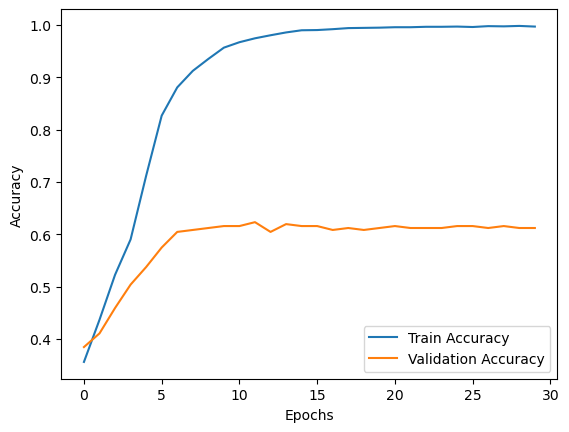

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

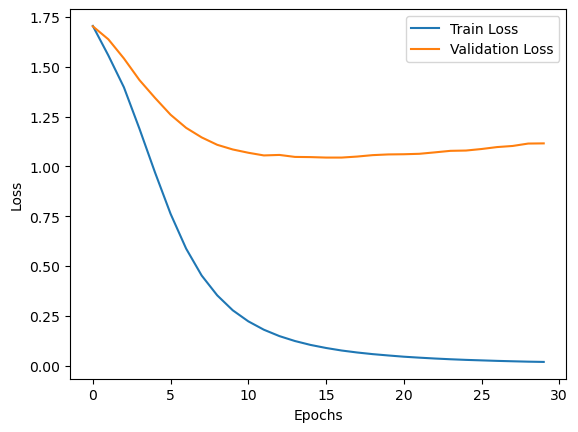

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

9/9 [==============================] - 0s 461us/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.44      0.53      0.48        15
                    Awareness       0.87      0.68      0.76        99
               Classification       0.11      0.25      0.15         8
Feelings and Problematization       0.72      0.55      0.63       110
                      Service       0.33      0.54      0.41        13
                       Stigma       0.00      0.00      0.00         1
                        Youth       0.68      0.86      0.76        22

                     accuracy                           0.61       268
                    macro avg       0.45      0.49      0.46       268
                 weighted avg       0.72      0.61      0.65       268



## TF-IDF 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(data['cleanText'].to_list())

In [20]:
features = tfidf_features.toarray()
labels = np.array(data['Class'])

In [21]:
from sklearn.model_selection import train_test_split
train_sequences, val_sequences, train_labels, val_labels = train_test_split(features, labels, test_size=0.1, random_state=20)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(train_sequences.shape[1],)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               2232320   
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 2234119 (8.52 MB)
Trainable params: 2234119 (8.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
76/76 [==============================] - 0s 4ms/step - loss: 1.6714 - accuracy: 0.4597 - val_loss: 1.4571 - val_accuracy: 0.4925
Epoch 2/30
76/76 [==============================] - 0s 4ms/step - loss: 1.0825 - accuracy: 0.6615 - val_loss: 1.0426 - val_accuracy: 0.6604
Epoch 3/30
76/76 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.8846 - val_loss: 0.8464 - val_accuracy: 0.7201
Epoch 4/30
76/76 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.9593 - val_loss: 0.7833 - val_accuracy: 0.7127
Epoch 5/30
76/76 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.9838 - val_loss: 0.7708 - val_accuracy: 0.7090
Epoch 6/30
76/76 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 0.9934 - val_loss: 0.7613 - val_accuracy: 0.7164
Epoch 7/30
76/76 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9950 - val_loss: 0.7749 - val_accuracy: 0.7090
Epoch 8/30
76/76 [==

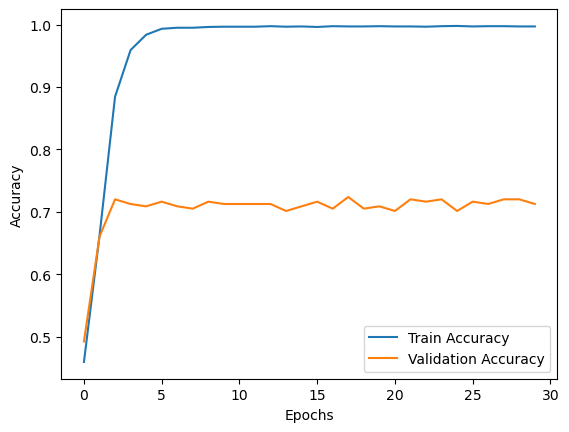

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

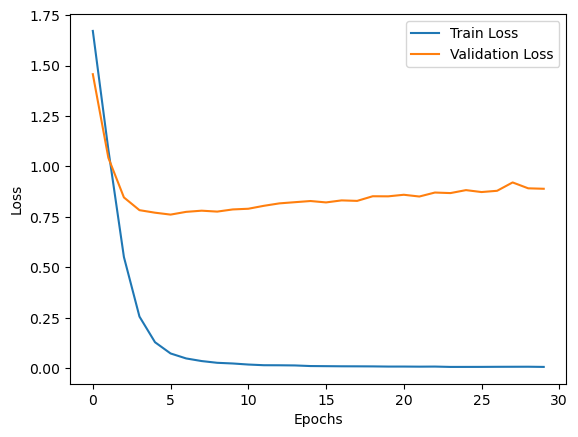

In [26]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

9/9 [==============================] - 0s 1ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.61      0.67      0.64        21
                    Awareness       0.81      0.77      0.79        94
               Classification       0.55      0.86      0.67        14
Feelings and Problematization       0.78      0.63      0.70        84
                      Service       0.52      0.62      0.57        21
                       Stigma       0.25      0.40      0.31         5
                        Youth       0.76      0.86      0.81        29

                     accuracy                           0.71       268
                    macro avg       0.61      0.69      0.64       268
                 weighted avg       0.73      0.71      0.72       268



## N-Grams

### 2-Grams

In [28]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data['cleanText'], np.array(data['Class']), test_size=0.1, random_state=20)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(2, 2))

In [30]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                609104    
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 609223 (2.32 MB)
Trainable params: 609223 (2.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=30, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/30
76/76 [==============================] - 1s 5ms/step - loss: 1.8131 - accuracy: 0.4394 - val_loss: 1.6891 - val_accuracy: 0.4701
Epoch 2/30
76/76 [==============================] - 0s 3ms/step - loss: 1.2619 - accuracy: 0.6682 - val_loss: 1.4630 - val_accuracy: 0.5299
Epoch 3/30
76/76 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.8883 - val_loss: 1.3334 - val_accuracy: 0.5709
Epoch 4/30
76/76 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.9601 - val_loss: 1.2646 - val_accuracy: 0.5896
Epoch 5/30
76/76 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9817 - val_loss: 1.2303 - val_accuracy: 0.5970
Epoch 6/30
76/76 [==============================] - 0s 3ms/step - loss: 0.1516 - accuracy: 0.9896 - val_loss: 1.2129 - val_accuracy: 0.5970
Epoch 7/30
76/76 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9925 - val_loss: 1.1957 - val_accuracy: 0.6045
Epoch 8/30
76/76 [==

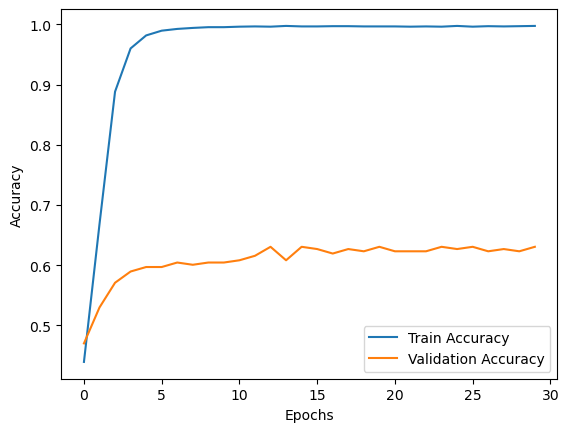

In [34]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

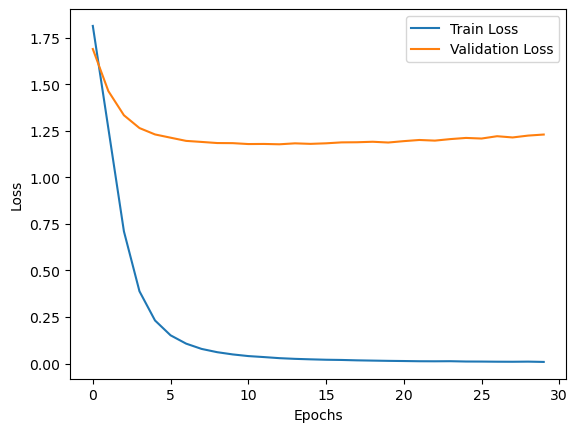

In [35]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
predictions = model.predict(test_vectors)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, test_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

9/9 [==============================] - 0s 1ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.52      0.75      0.62        16
                    Awareness       0.92      0.67      0.77       123
               Classification       0.14      1.00      0.24         3
Feelings and Problematization       0.72      0.51      0.60        96
                      Service       0.40      0.83      0.54        12
                       Stigma       0.12      0.33      0.18         3
                        Youth       0.36      0.80      0.50        15

                     accuracy                           0.63       268
                    macro avg       0.46      0.70      0.49       268
                 weighted avg       0.75      0.63      0.66       268



### 3-Grams

In [37]:
vectorizer = CountVectorizer(ngram_range=(3,3))
vectorizer.fit(train_data)

CountVectorizer(ngram_range=(3, 3))

In [38]:
train_vectors = vectorizer.transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=train_vectors.shape[1]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                783792    
                                                                 
 flatten_3 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 7)                 119       
                                                                 
Total params: 783911 (2.99 MB)
Trainable params: 783911 (2.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_vectors, train_labels, epochs=30, batch_size=32, validation_data=(test_vectors, test_labels))

Epoch 1/30
76/76 [==============================] - 1s 6ms/step - loss: 1.8842 - accuracy: 0.3758 - val_loss: 1.8047 - val_accuracy: 0.4216
Epoch 2/30
76/76 [==============================] - 0s 4ms/step - loss: 1.4217 - accuracy: 0.6445 - val_loss: 1.6042 - val_accuracy: 0.4366
Epoch 3/30
76/76 [==============================] - 0s 4ms/step - loss: 0.8365 - accuracy: 0.8497 - val_loss: 1.4882 - val_accuracy: 0.4776
Epoch 4/30
76/76 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.9535 - val_loss: 1.4282 - val_accuracy: 0.4851
Epoch 5/30
76/76 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9680 - val_loss: 1.3987 - val_accuracy: 0.4813
Epoch 6/30
76/76 [==============================] - 0s 4ms/step - loss: 0.1487 - accuracy: 0.9838 - val_loss: 1.3851 - val_accuracy: 0.4963
Epoch 7/30
76/76 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9925 - val_loss: 1.3797 - val_accuracy: 0.4963
Epoch 8/30
76/76 [==

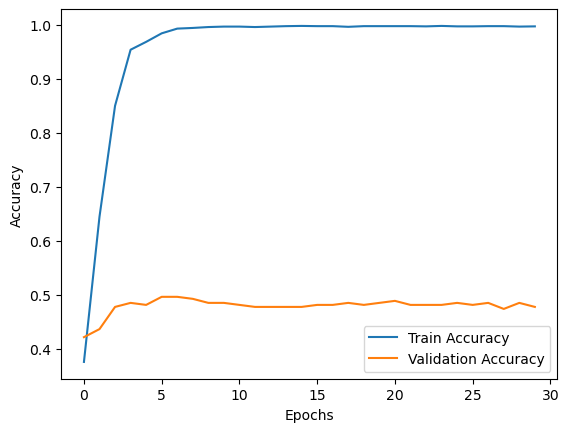

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

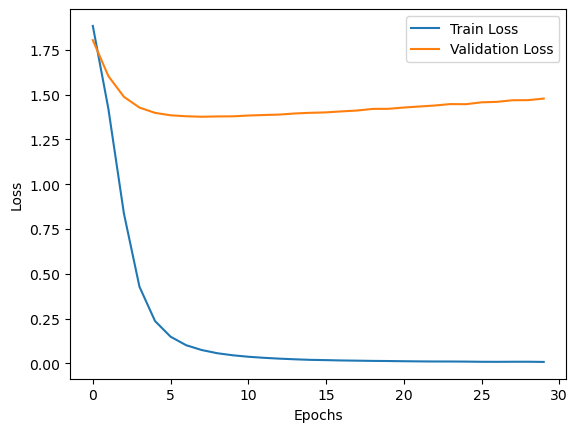

In [43]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
predictions = model.predict(test_vectors)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, test_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

9/9 [==============================] - 0s 2ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.39      0.90      0.55        10
                    Awareness       0.98      0.44      0.61       196
               Classification       0.00      0.00      0.00         0
Feelings and Problematization       0.34      0.46      0.39        50
                      Service       0.04      1.00      0.08         1
                       Stigma       0.12      1.00      0.22         1
                        Youth       0.21      0.70      0.33        10

                     accuracy                           0.48       268
                    macro avg       0.30      0.64      0.31       268
                 weighted avg       0.80      0.48      0.55       268



/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## FastText

In [45]:
import fasttext

ft = fasttext.load_model('../../fasttext/cc.id.300.bin')

In [46]:
vocab_size = len(tokenizer.word_index) + 1

In [47]:
embedding_dim = 300  # Dimensionality of the word embeddings

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in ft:
        embedding_matrix[i] = ft[word]

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 58, 300)           2621700   
                                                                 
 bidirectional (Bidirection  (None, 58, 128)           186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 2850251 (10.87 MB)
Trainable params: 228551 (892.78 KB)
Non-trainable params: 2621700 (10.00 MB)
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [51]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/30
76/76 [==============================] - 13s 133ms/step - loss: 1.6861 - accuracy: 0.3792 - val_loss: 1.6362 - val_accuracy: 0.3731
Epoch 2/30
76/76 [==============================] - 12s 160ms/step - loss: 1.4632 - accuracy: 0.4718 - val_loss: 1.2914 - val_accuracy: 0.5522
Epoch 3/30
76/76 [==============================] - 13s 168ms/step - loss: 1.2766 - accuracy: 0.5453 - val_loss: 1.1689 - val_accuracy: 0.5746
Epoch 4/30
76/76 [==============================] - 13s 174ms/step - loss: 1.1413 - accuracy: 0.5955 - val_loss: 1.0698 - val_accuracy: 0.6157
Epoch 5/30
76/76 [==============================] - 13s 172ms/step - loss: 1.1024 - accuracy: 0.5997 - val_loss: 1.0578 - val_accuracy: 0.6157
Epoch 6/30
76/76 [==============================] - 13s 176ms/step - loss: 1.0546 - accuracy: 0.6146 - val_loss: 1.0149 - val_accuracy: 0.6381
Epoch 7/30
76/76 [==============================] - 13s 173ms/step - loss: 1.0375 - accuracy: 0.6184 - val_loss: 0.9912 - val_accuracy: 0.6418

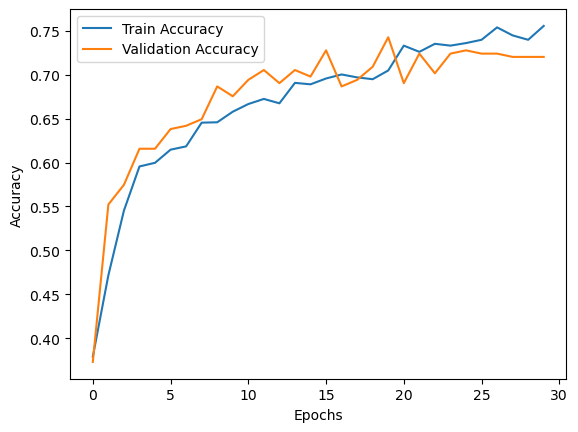

In [52]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

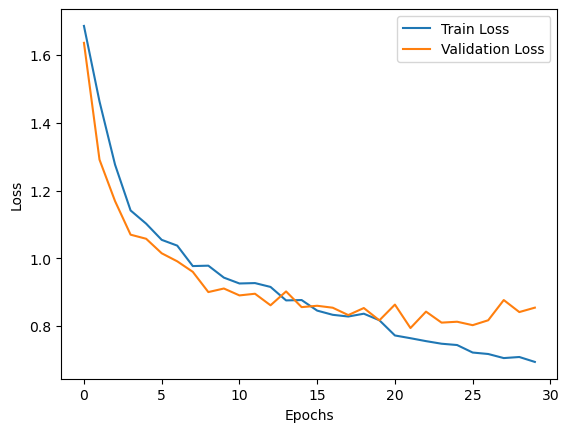

In [53]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(predicted_labels, val_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

9/9 [==============================] - 0s 17ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.78      0.60      0.68        30
                    Awareness       0.74      0.88      0.80        75
               Classification       0.59      0.81      0.68        16
Feelings and Problematization       0.84      0.58      0.69        98
                      Service       0.40      0.71      0.51        14
                       Stigma       0.00      0.00      0.00         0
                        Youth       0.88      0.83      0.85        35

                     accuracy                           0.72       268
                    macro avg       0.60      0.63      0.60       268
                 weighted avg       0.77      0.72      0.73       268



/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## BPE (Byte-Pair Encoding)

In [55]:
from bpemb import BPEmb

bpe_id = BPEmb(lang='id', vs=100000, dim=100)

In [56]:
embedding_matrix = data['cleanText'].apply(bpe_id.encode_ids)

In [57]:
max_length = max(embedding_matrix.apply(len))
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(embedding_matrix, maxlen=max_length)

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(bpe_id.vectors.shape[0], bpe_id.vectors.shape[1], input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 71, 100)           10000000  
                                                                 
 bidirectional_2 (Bidirecti  (None, 71, 128)           84480     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 7)                 455       
                                                                 
Total params: 10126151 (38.63 MB)
Trainable params: 10126151 (38.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [60]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
76/76 [==============================] - 15s 154ms/step - loss: 1.6733 - accuracy: 0.3343 - val_loss: 1.5904 - val_accuracy: 0.4067
Epoch 2/30
76/76 [==============================] - 13s 178ms/step - loss: 1.3303 - accuracy: 0.5108 - val_loss: 1.2860 - val_accuracy: 0.5075
Epoch 3/30
76/76 [==============================] - 14s 184ms/step - loss: 0.9972 - accuracy: 0.6437 - val_loss: 1.1661 - val_accuracy: 0.5597
Epoch 4/30
76/76 [==============================] - 14s 183ms/step - loss: 0.7498 - accuracy: 0.7359 - val_loss: 0.9936 - val_accuracy: 0.6418
Epoch 5/30
76/76 [==============================] - 14s 183ms/step - loss: 0.5981 - accuracy: 0.7741 - val_loss: 1.0562 - val_accuracy: 0.6530
Epoch 6/30
76/76 [==============================] - 14s 184ms/step - loss: 0.5379 - accuracy: 0.8036 - val_loss: 1.0542 - val_accuracy: 0.6978
Epoch 7/30
76/76 [==============================] - 14s 183ms/step - loss: 0.4353 - accuracy: 0.8443 - val_loss: 1.0612 - val_accuracy: 0.6716

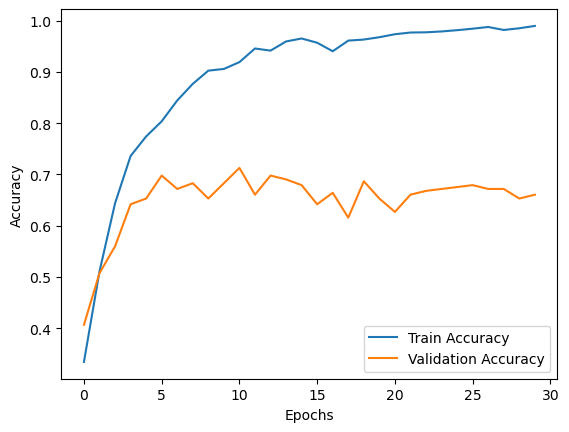

In [62]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

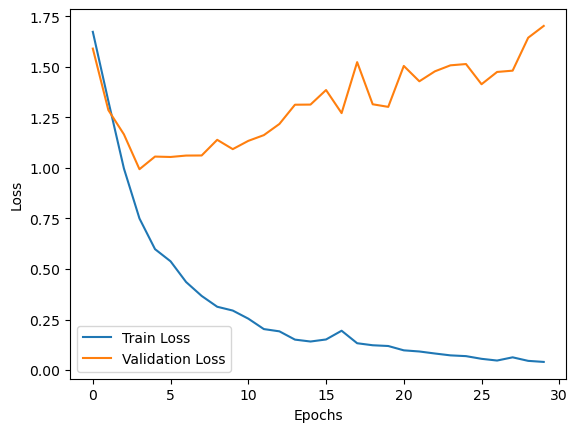

In [63]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(val_labels, predicted_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

9/9 [==============================] - 0s 17ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.55      0.52      0.53        23
                    Awareness       0.88      0.72      0.79        89
               Classification       0.43      0.55      0.48        22
Feelings and Problematization       0.63      0.71      0.67        68
                      Service       0.52      0.56      0.54        25
                       Stigma       0.13      0.25      0.17         8
                        Youth       0.93      0.76      0.83        33

                     accuracy                           0.66       268
                    macro avg       0.58      0.58      0.57       268
                 weighted avg       0.70      0.66      0.67       268



## GloVe + Bidirectional LSTM

In [65]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['cleanText'].to_list())
sequences = tokenizer.texts_to_sequences(data['cleanText'].to_list())

In [66]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

In [67]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [68]:
glove_file = '../../glove/glove.twitter.27B.200d.txt'
embeddings_index = {}
with open(glove_file, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embeddings = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embeddings

In [69]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [70]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.3, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.7, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 58, 200)           1747800   
                                                                 
 bidirectional_4 (Bidirecti  (None, 58, 128)           135680    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1925151 (7.34 MB)
Trainable params: 177351 (692.78 KB)
Non-trainable params: 1747800 (6.67 MB)
_________________________________________________________________


In [71]:
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    padded_sequences, np.array(data['Class']), test_size=0.1, random_state=20)

In [72]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-2)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_sequences, train_labels, epochs=30, validation_data=(val_sequences, val_labels))

Epoch 1/30
76/76 [==============================] - 12s 120ms/step - loss: 1.5277 - accuracy: 0.4431 - val_loss: 1.3172 - val_accuracy: 0.4888
Epoch 2/30
76/76 [==============================] - 10s 135ms/step - loss: 1.2920 - accuracy: 0.5461 - val_loss: 1.0587 - val_accuracy: 0.6493
Epoch 3/30
76/76 [==============================] - 11s 140ms/step - loss: 1.0993 - accuracy: 0.5988 - val_loss: 1.0598 - val_accuracy: 0.6157
Epoch 4/30
76/76 [==============================] - 11s 140ms/step - loss: 1.0049 - accuracy: 0.6370 - val_loss: 0.9461 - val_accuracy: 0.6418
Epoch 5/30
76/76 [==============================] - 11s 141ms/step - loss: 0.9412 - accuracy: 0.6690 - val_loss: 0.9746 - val_accuracy: 0.6455
Epoch 6/30
76/76 [==============================] - 11s 141ms/step - loss: 0.9599 - accuracy: 0.6649 - val_loss: 0.9485 - val_accuracy: 0.6866
Epoch 7/30
76/76 [==============================] - 11s 140ms/step - loss: 0.9251 - accuracy: 0.6728 - val_loss: 0.8676 - val_accuracy: 0.6940

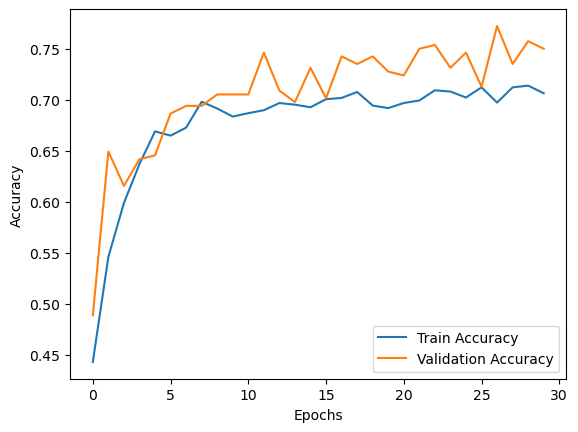

In [74]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

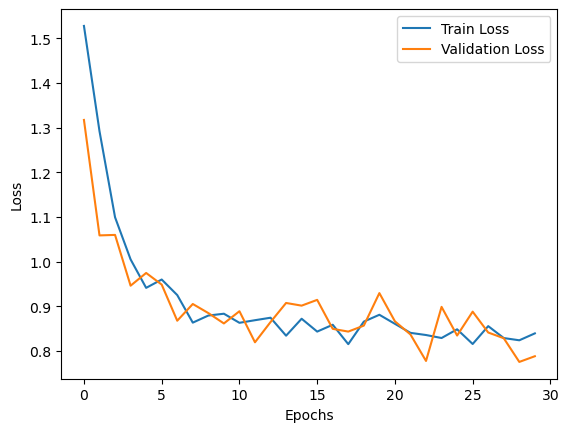

In [75]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
from sklearn.metrics import classification_report

predictions = model.predict(val_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

classification_rep = classification_report(val_labels, predicted_labels, target_names=['Accessibility and Funding', 'Awareness', 'Classification', 'Feelings and Problematization', 'Service', 'Stigma', 'Youth'])
print(classification_rep)

9/9 [==============================] - 0s 19ms/step
                               precision    recall  f1-score   support

    Accessibility and Funding       0.52      0.70      0.59        23
                    Awareness       0.85      0.88      0.86        89
               Classification       0.92      0.55      0.69        22
Feelings and Problematization       0.69      0.78      0.73        68
                      Service       0.55      0.44      0.49        25
                       Stigma       0.00      0.00      0.00         8
                        Youth       0.89      0.94      0.91        33

                     accuracy                           0.75       268
                    macro avg       0.63      0.61      0.61       268
                 weighted avg       0.74      0.75      0.74       268



/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/athena/mlenv/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
